# Задача 1

Пусть $X_1, X_2, \ldots, X_n$ — выборка из экспоненциального распределения с параметром $\lambda$. Найти оценку максимального правдоподобия параметра $\lambda$, сравнить ее с байесовской оценкой (MAP и математическое ожидание апостреорного распределения), подобрав сопряженное распределение. Сравнить полученные байесовские оценки с оценкой MLE. Найти предсказательное распределение

1. **MLE.**

Пусть $X_1, X_2, \ldots, X_n$ — выборка из экспоненциального распределения с плотностью:

$$
f(x|\lambda) = \lambda e^{-\lambda x}, \quad x \geq 0, \ \lambda > 0
$$

Функция правдоподобия:

$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda X_i} = \lambda^n e^{-\lambda \sum_{i=1}^n X_i}
$$

Логарифмическая функция правдоподобия:

$$
\ell(\lambda) = n \ln \lambda - \lambda \sum_{i=1}^n X_i
$$

Дифференцируем по $\lambda$:

$$
\frac{\partial \ell}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^n X_i
$$

Приравниваем к нулю:

$$
\frac{n}{\lambda} - \sum_{i=1}^n X_i = 0 \quad \Rightarrow \quad \lambda_{\text{MLE}} = \frac{n}{\sum_{i=1}^n X_i} = \frac{1}{\bar{X}},
$$

где $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ — выборочное среднее.

2. **Байесовский анализ с сопряженным априорным распределением.**

Для экспоненциального распределения сопряженным априорным является \textbf{гамма-распределение}:

$$
\pi(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda}, \quad \lambda > 0, \ \alpha > 0, \ \beta > 0
$$

**Апостериорное распределение.**

Апостериорная плотность пропорциональна произведению правдоподобия и априорной плотности:

\begin{align*}
\pi(\lambda|X) &\propto L(\lambda) \pi(\lambda) \\
&\propto \lambda^n e^{-\lambda \sum X_i} \cdot \lambda^{\alpha-1} e^{-\beta \lambda} \\
&= \lambda^{\alpha + n - 1} e^{-\lambda (\beta + \sum X_i)}
\end{align*}

Это ядро гамма-распределения:

$$
\lambda|X \sim \text{Gamma}(\alpha + n, \beta + \sum_{i=1}^n X_i)
$$

**Байесовские оценки.**

MAP ддля Gamma$(a, b)$ равна $(a-1)/b$ при $a \geq 1$.
Здесь $a = \alpha + n$, $b = \beta + \sum X_i$, поэтому:

$$
\lambda_{\text{MAP}} = \frac{\alpha + n - 1}{\beta + \sum_{i=1}^n X_i}, \quad \text{при условии } \alpha + n \geq 1
$$

**Среднее апостериорного распределение.**

Для Gamma$(a, b)$ математическое ожидание равно $a/b$, поэтому:

$$
\lambda_{\text{PM}} = \frac{\alpha + n}{\beta + \sum_{i=1}^n X_i}
$$

3. **Сравнение оценок.**

$$
\lambda_{\text{MLE}} = \dfrac{n}{\sum X_i},
$$
$$
\lambda_{\text{MAP}} = \dfrac{\alpha + n - 1}{\beta + \sum X_i},
$$
$$
\lambda_{\text{PM}} = \dfrac{\alpha + n}{\beta + \sum X_i}.
$$

Запишем все оценки в виде:
$$
\lambda_{\text{MAP}} = \frac{n + \alpha - 1}{\sum X_i + \beta}, \quad
\lambda_{\text{PM}} = \frac{n + \alpha}{\sum X_i + \beta}
$$

При $n \to \infty$ все три оценки сходятся к $\lambda_{\text{MLE}}$, так как влияние априорных параметров $\alpha$ и $\beta$ становится пренебрежимо малым.

При малых $n$ байесовские оценки смещены в сторону априорного среднего $\mathbb{E}[\lambda] = \alpha/\beta$.

4. **Предсказательное распределение.**

Предсказательное распределение для нового наблюдения $X_{n+1}$:
\begin{align*}
p(x_{\text{new}}|X) &= \int_0^\infty f(x_{\text{new}}|\lambda) \pi(\lambda|X) d\lambda \\
&= \int_0^\infty \lambda e^{-\lambda x_{\text{new}}} \cdot \frac{b^a}{\Gamma(a)} \lambda^{a-1} e^{-b\lambda} d\lambda \\
&= \frac{b^a}{\Gamma(a)} \int_0^\infty \lambda^a e^{-\lambda(x_{\text{new}} + b)} d\lambda
\end{align*}
где $a = \alpha + n$, $b = \beta + \sum X_i$.

Используем формулу для гамма-интеграла: $\int_0^\infty \lambda^a e^{-c\lambda} d\lambda = \Gamma(a+1)/c^{a+1}$ при $c > 0$.
Тогда:
\begin{align*}
p(x_{\text{new}}|X) &= \frac{b^a}{\Gamma(a)} \cdot \frac{\Gamma(a+1)}{(x_{\text{new}} + b)^{a+1}} \\
&= \frac{a b^a}{(x_{\text{new}} + b)^{a+1}}, \quad x_{\text{new}} > 0
\end{align*}

Это распределение Ломакса или Парето II типа с параметрами формы: $a = \alpha + n$; масштаба: $b = \beta + \sum X_i$


В альтернативной записи:
$$
p(x_{\text{new}}|X) = \frac{a}{b} \left(1 + \frac{x_{\text{new}}}{b}\right)^{-(a+1)}
$$

MLE: λ = 2.3642
MAP: λ = 2.3026
Posterior Mean: λ = 2.3478


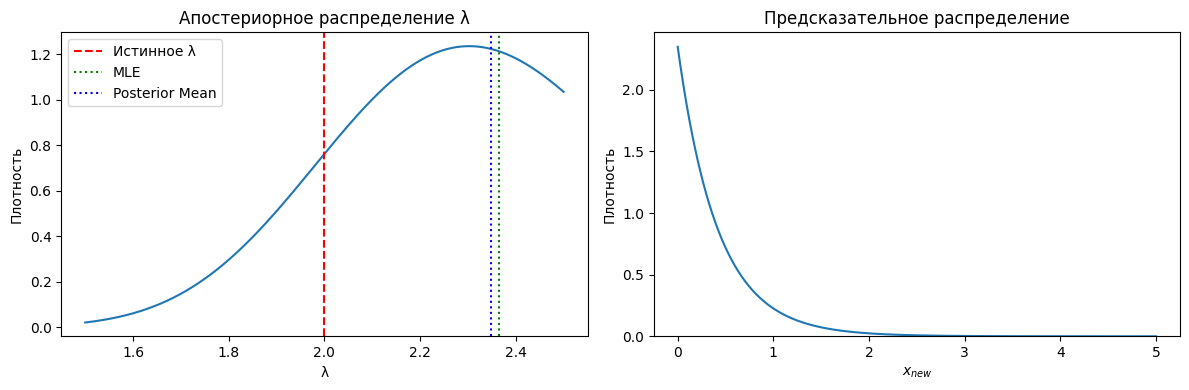

In [1]:
# 5. численная иллюстрация.

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)
n = 50
true_lambda = 2.0
X = stats.expon(scale=1/true_lambda).rvs(n)

# MLE
lambda_mle = n / X.sum()
print(f"MLE: λ = {lambda_mle:.4f}")

# Байес
alpha_prior = 2.0  # априорный параметр формы
beta_prior = 1.0   # априорный параметр масштаба

lambda_map = (alpha_prior + n - 1) / (beta_prior + X.sum())
lambda_pm = (alpha_prior + n) / (beta_prior + X.sum())
print(f"MAP: λ = {lambda_map:.4f}")
print(f"Posterior Mean: λ = {lambda_pm:.4f}")

# апостериорное распределение
a_post = alpha_prior + n
b_post = beta_prior + X.sum()
posterior = stats.gamma(a=a_post, scale=1/b_post)

# предсказательное распределение
x_grid = np.linspace(0, 5, 1000)
predictive = a_post * b_post**a_post / (x_grid + b_post)**(a_post + 1)

# визуал
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# апостериорное распределение
lambda_grid = np.linspace(1.5, 2.5, 1000)
ax1.plot(lambda_grid, posterior.pdf(lambda_grid))
ax1.axvline(true_lambda, color='r', linestyle='--', label='Истинное λ')
ax1.axvline(lambda_mle, color='g', linestyle=':', label='MLE')
ax1.axvline(lambda_pm, color='b', linestyle=':', label='Posterior Mean')
ax1.set_xlabel('λ')
ax1.set_ylabel('Плотность')
ax1.set_title('Апостериорное распределение λ')
ax1.legend()

# предсказательное распределение
ax2.plot(x_grid, predictive)
ax2.set_xlabel('$x_{new}$')
ax2.set_ylabel('Плотность')
ax2.set_title('Предсказательное распределение')
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

# сравнение с истинным экспоненциальным распределением
true_exp = stats.expon(scale=1/true_lambda).pdf(x_grid)
ax2.plot(x_grid, true_exp, 'r--', alpha=0.7, label='Истинное распределение')
ax2.legend()

# Задача 2

**Мультиномиальное распределение**

Пусть проводится серия из $n$ испытаний и в результате каждого испытания происходит ровно одно событие из набора $A_1, A_2, \dots, A_m$, причем вероятности этих событий равны соответственно $\mathsf{p}_1, \mathsf{p}_2, \dots, \mathsf{p}_m$, причем
$$\sum_{i=1}^{m}\mathsf{p}_i = 1.$$

Тогда совместное распределение величин $X_1, X_2, \dots, X_m$, где $X_k$ — число наступлений события $A_k$ в серии из $n$ испытаний, задается вероятностями

$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

где $n_1, n_2, \dots, n_m$ — произвольный набор целых неотрицательных чисел, таких что

$$\sum_{i=1}^m n_i = n.$$

Произведите байесовский вывод для мультиномиального распределения: найдите апостериорное распределение, используя в качестве сопоряженного распределения к правдоподобию [распределение Дирихле](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%94%D0%B8%D1%80%D0%B8%D1%85%D0%BB%D0%B5), найдите предсказательное распределение. Объясните результат.

## Байесовский вывод для мультиномиального распределения.
1. **Правдоподобие.**

Функция правдоподобия для параметров $\mathbf{p} = (p_1, \dots, p_m)$ для указанных данных имеет вид:
$$
L(\mathbf{p}|\mathbf{n}) = \frac{n!}{n_1!\dots n_m!} \prod_{i=1}^m p_i^{n_i}.
$$

Но мультиномиальный множитель $\frac{n!}{n_1!\cdots n_m!}$ не содержит параметров $\mathbf{p}$, поэтому достаточно рассматривать

$$
L(\mathbf{p}|\mathbf{n}) \propto \prod_{i=1}^m p_i^{n_i}.
$$

2. **Сопряжённое априорное распределение Дирихле.**

Априорное распределение Дирихле с параметрами $\boldsymbol{\alpha} = (\alpha_1,\dots,\alpha_m)$, $\alpha_i > 0$:
$$
p(\mathbf{p}|\boldsymbol{\alpha}) = \frac{\Gamma(\sum_{i=1}^m \alpha_i)}{\prod_{i=1}^m \Gamma(\alpha_i)} \prod_{i=1}^m p_i^{\alpha_i - 1},
$$

где $\mathbf{p}$ принадлежит стандартному $(m-1)$-мерному симплексу ($p_i \ge 0$, $\sum_{i=1}^m p_i = 1$).

3. **Апостериорное распределение.**

Апостериорное распределение пропорционально произведению априорного и правдоподобия:

$$
p(\mathbf{p}|\mathbf{n}, \boldsymbol{\alpha}) \propto p(\mathbf{p}|\boldsymbol{\alpha}) \cdot L(\mathbf{p}|\mathbf{n}) \propto \prod_{i=1}^m p_i^{\alpha_i - 1} \cdot \prod_{i=1}^m p_i^{n_i} = \prod_{i=1}^m p_i^{\alpha_i + n_i - 1}.
$$

Это ядро распределения Дирихле с параметрами $\boldsymbol{\alpha}' = (\alpha_1 + n_1, \dots, \alpha_m + n_m)$. Следовательно, апостериорное распределение имеет вид:

$$
\mathbf{p}|\mathbf{n}, \boldsymbol{\alpha} \sim \text{Dirichlet}(\alpha_1 + n_1, \dots, \alpha_m + n_m).
$$

В полной записи с нормировкой

$$
p(\mathbf{p}|\mathbf{n}, \boldsymbol{\alpha}) = \frac{\Gamma(\sum_{i=1}^m (\alpha_i + n_i))}{\prod_{i=1}^m \Gamma(\alpha_i + n_i)} \prod_{i=1}^m p_i^{\alpha_i + n_i - 1}.
$$

4. Смысл параметров и выбор априора.

Параметры $\alpha_i$ априорного распределения Дирихле допускают интерпретацию как "виртуальные наблюдения" события $i$ до проведения реального эксперимента. После получения фактических частот $n_i$ апостериорные параметры становятся $\alpha_i' = \alpha_i + n_i$.

Частные случаи:

При $\alpha_i = 1$ для всех $i$ получаем равномерный априор на симплексе.

При $\alpha_i = 0$ формально возникает неинформативный априор Джеффри, однако такое распределение является несобственным и требует осторожности при использовании.

## Предсказательное распределение.

1. **П.Р. для одного нового испытания.**

Рассмотрим одно новое испытание. Вероятность того, что его результатом будет событие $j$, определяется как математическое ожидание $p_j$ относительно апостериорного распределения:

$$
p(X_{new}=j | \mathbf{n}, \boldsymbol{\alpha}) = \int_{\Delta^{m-1}} p_j \cdot p(\mathbf{p}|\mathbf{n}, \boldsymbol{\alpha}) d\mathbf{p}.
$$

Поскольку для распределения Дирихле $\mathbb{E}[p_j] = \frac{\alpha_j'}{\sum_{i=1}^m \alpha_i'}$, получаем:

$$
p(X_{new}=j | \mathbf{n}, \boldsymbol{\alpha}) = \frac{\alpha_j + n_j}{\sum_{i=1}^m (\alpha_i + n_i)}.
$$

2. **Для нескольких новых испытаний.**

Пусть теперь планируется $N$ новых независимых испытаний, и нас интересует вероятность получения конкретной комбинации частот $\mathbf{m} = (m_1, \dots, m_m)$ ($\sum_i m_i = N$). Предсказательное распределение вычисляется как среднее значение мультиномиальной вероятности по апостериорному распределению параметров:

$$
p(\mathbf{m}|\mathbf{n}, \boldsymbol{\alpha}) = \int_{\Delta^{m-1}} \text{Multinomial}(\mathbf{m}|N, \mathbf{p}) \cdot \text{Dirichlet}(\mathbf{p}|\boldsymbol{\alpha}') d\mathbf{p}.
$$

Распишем:

$$
p(\mathbf{m}|\mathbf{n}, \boldsymbol{\alpha}) = \frac{N!}{m_1!\dots m_m!} \int \prod_{i=1}^m p_i^{m_i} \cdot \frac{\Gamma(\sum_i \alpha_i')}{\prod_i \Gamma(\alpha_i')} \prod_{i=1}^m p_i^{\alpha_i' - 1} d\mathbf{p}.
$$

Интеграл сводится к интегралу от ядра Дирихле с параметрами $\alpha_i'' = \alpha_i' + m_i$:

$$
\int \prod_{i=1}^m p_i^{\alpha_i' + m_i - 1} d\mathbf{p} = \frac{\prod_i \Gamma(\alpha_i' + m_i)}{\Gamma(\sum_i (\alpha_i' + m_i))}.
$$

Тогда:

$$
p(\mathbf{m}|\mathbf{n}, \boldsymbol{\alpha}) = \frac{N!}{m_1!\dots m_m!} \cdot \frac{\Gamma(\sum_i \alpha_i')}{\prod_i \Gamma(\alpha_i')} \cdot \frac{\prod_i \Gamma(\alpha_i' + m_i)}{\Gamma(\sum_i (\alpha_i' + m_i))}.
$$

## Объяснение результатов.

Апостериорное распределение — остаётся в семействе Дирихле, что обеспечивает аналитическую простоту и лёгкую интерпретацию: наши знания о вероятностях $\mathbf{p}$ обновляются простым добавлением наблюдений к априорным "псевдосчётчикам".

Точечные оценки — апостериорное среднее даёт сглаженную оценку вероятностей, которая при малых $n$ смещена в сторону априорного ожидания, а при $n \to \infty$ сходится к оценке максимального правдоподобия $\hat{p}_i^{\text{ММП}} = n_i/n$.

Предсказание для одного испытания — просто использует апостериорное среднее, что является байесовской оценкой вероятности каждого исхода.

Дирихле-мультиномиальное распределение (еще называется многомерным бета-биномиальным) — отражает дополнительную неопределённость, возникающую из-за того, что параметры $\mathbf{p}$ известны не точно, а через их апостериорное распределение. По сравнению с обычным мультиномиальным распределением при фиксированных $\mathbf{p}$, это распределение имеет большую дисперсию, что соответствует нашему частичному незнанию параметров модели.